# Introduction to PL/pgSQL variables

* In PL/pgSQL, variables are placeholders for storing data within a block. 
* These variables can hold values of various types, such as **integers**, **booleans**, **text**, and more.
* Variables allow you to hold values for calculations, store query results, and so on.
* Before using variables, you must declare them in the declaration section of a block.
* Variables are **scoped to the block** in which they’re declared.
* It means that variables are accessible only within the block and any nested blocks.

**Syntax of declaring a variable**
```postgresql
variable_name data_type [= expression];
```

* The data type can be any valid data type, such as `integer`, `numeric`, `varchar`, and `char`.
* We can optionally assign a **default value** to the variable.
* If you don’t do so, the initial value of the variable is `NULL`.

> Please note that you can use either `:=` or `=` assignment operator to set an initial value for a variable.

**Example**
```postgresql
variable_name = value;
variable_name := value;
```

# Declare & Initialize variables

```postgresql
do $$
declare
   counter    integer = 1;
   first_name varchar(50) = 'John';
   last_name  varchar(50) = 'Doe';
   payment    numeric(11,2) = 20.5;
begin
   raise notice '% % % has been paid % USD',
       counter,
	   first_name,
	   last_name,
	   payment;
end $$; 
```

**Output:**
```
notice: 1 John Doe has been paid 20.5 USD;
```

# Assign values to variables

```postgresql
do $$
declare
	first_name VARCHAR(50);
begin
	first_name = split_part('John Doe',' ', 1);
	raise notice 'The first name is %', first_name;
end;
$$; 
```

**Output**
```
NOTICE:  The first name is John
```


Split a string literal into two parts using a space, return the first part, and assign it to the `first_name` variable:
```postgresql
first_name = split_part('John Doe',' ', 1);
```

# Variable initialization timing

PostgreSQL evaluates the initial value of a variable and assigns it when the block is entered. 

```postgresql
do $$
declare
   created_at time = clock_timestamp();
begin
   raise notice '%', created_at;
   perform pg_sleep(3);
   raise notice '%', created_at;
end $$; 
```

**Here is the output:**
```
NOTICE:  14:23:33.064008
NOTICE:  14:23:33.064008
```

The output indicates that the value of the `created_at` variable is only initialized once when the block is entered.

# Copying data types

* The `%type` provides the data type of a table column or another variable.
* Typically, you use the `%type` to declare a variable that holds a value from the database or another variable.

**Declare a variable with the data type of a table column**
```postgresql
variable_name table_name.column_name%type; 
```

**Declare a variable with the data type of another variable**
```postgresql
variable_name variable%type; 
```

Let's use the following `film` table from the sample database:

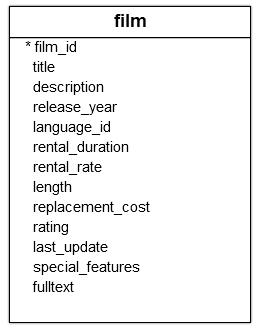

This example uses the **type-copying technique** to declare variables that hold values that come from the `film` table:

```postgresql
do
$$
declare
   film_title film.title%type;
   featured_title film_title%type;
begin
   -- get title of the film id 100
   select title
   from film
   into film_title
   where film_id = 100;

   -- show the film title
   raise notice 'Film title id 100: %s', film_title;
end; $$;
```

**Output:**
```
NOTICE:  Film title id 100: Brooklyn Deserts
DO
```

In this example, we declare two variables:
* The `film_title` variable has the same data type as the `title` column in the `film` table from the sample database.
* The `featured_title` has the same data type as the data type of the `film_title` variable.

We use the `select into` statement to retrieve from the `film_title` column of the `film` table and assign it to the `film_title` variable.

Using the **type-copying** feature offers the following advantages:
* First, you don’t need to know the type of column or reference being accessed.
* Second, if the data type of the referenced column name (or variable) changes, you don’t need to change the block.

# Variables in blocks and subblocks

When you declare a variable in a subblock with the same name as another variable in the outer block, the variable in the outer block is hidden within the subblock.

To access a variable in the outer block, you use the block label to qualify its name, as shown in the following example:

```postgresql
do
$$
<<outer_block>>
declare
  counter integer := 0;
begin
   counter := counter + 1;
   raise notice 'The current value of the counter is %', counter;

   declare
       counter integer := 0;
   begin
       counter := counter + 10;
       raise notice 'Counter in the subblock is %', counter;
       raise notice 'Counter in the outer block is %', outer_block.counter;
   end;

   raise notice 'Counter in the outer block is %', counter;

end outer_block $$;
```

**Output**
```
NOTICE:  The current value of the counter is 1
NOTICE:  Counter in the subblock is 10
NOTICE:  Counter in the outer block is 1
NOTICE:  Counter in the outer block is 1
```

To reference the `counter` variable in the **outer** block, we have to use the block label as follows: `outer_block.counter`.